# Graficas ejecución de escenarios para el Algoritmo Genético

In [1]:
%matplotlib notebook

In [2]:
import os
import glob
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sklearn.metrics as metrics
import scripts.funciones as funciones

## Probabilidad de mutacion

In [4]:
with open('data/output/resultado_escenario1_Mutacion.json') as json_file:
    mut1 = json.load(json_file)
    
with open('data/output/resultado_escenario2_Mutacion.json') as json_file:
    mut2 = json.load(json_file)
    
with open('data/output/resultado_escenario3_Mutacion.json') as json_file:
    mut3 = json.load(json_file)

<IPython.core.display.Javascript object>


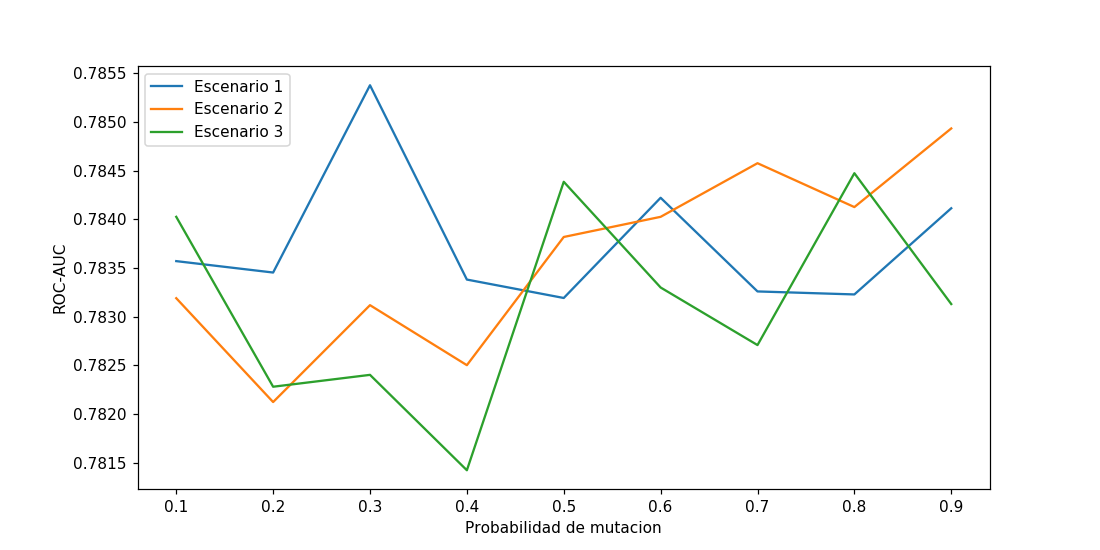

Text(0, 0.5, 'ROC-AUC')

In [5]:
plt.figure('Probabilidad de Mutacion VS ROC-AUC (Validacion)', figsize=(10,5))
plt.plot(mut1['prob_mutacion'],mut1['best_scores'], label = 'hola')
plt.plot(mut2['prob_mutacion'],mut2['best_scores'])
plt.plot(mut3['prob_mutacion'],mut3['best_scores'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Probabilidad de mutacion')
plt.ylabel('ROC-AUC')

<IPython.core.display.Javascript object>


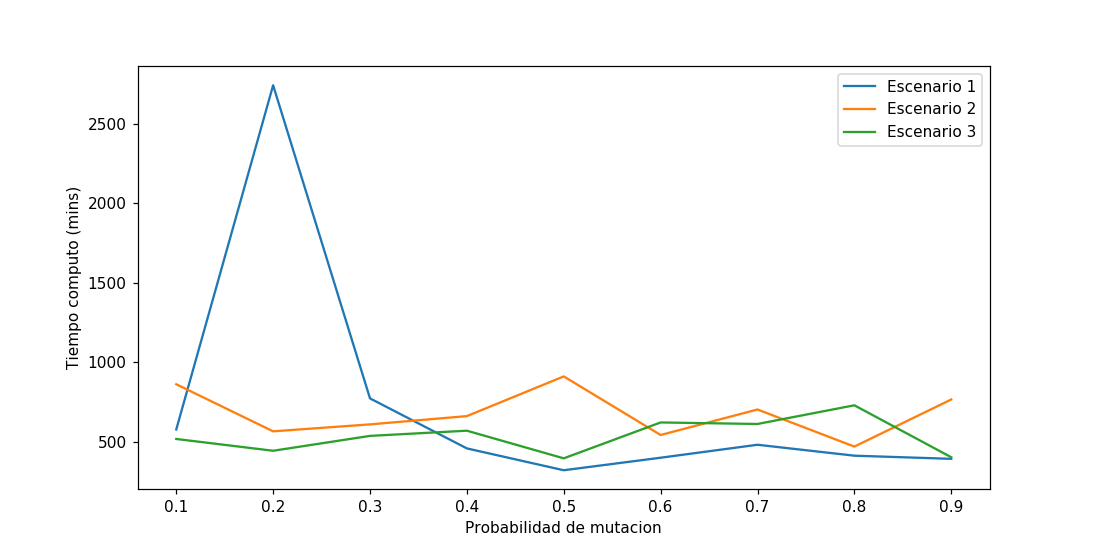

Text(0, 0.5, 'Tiempo computo (mins)')

In [6]:
plt.figure('Probabilidad de Mutacion VS Tiempo Computo', figsize=(10,5))
plt.plot(mut1['prob_mutacion'],mut1['tiempo'], label = 'hola')
plt.plot(mut2['prob_mutacion'],mut2['tiempo'])
plt.plot(mut3['prob_mutacion'],mut3['tiempo'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Probabilidad de mutacion')
plt.ylabel('Tiempo computo (mins)')

## Porcentaje de poblacion a conservar por iteracion

In [6]:
with open('data/output/resultado_escenario1_Seleccion.json') as json_file:
    pob1 = json.load(json_file)
    
with open('data/output/resultado_escenario2_Seleccion.json') as json_file:
    pob2 = json.load(json_file)
    
with open('data/output/resultado_escenario3_Seleccion.json') as json_file:
    pob3 = json.load(json_file)

<IPython.core.display.Javascript object>


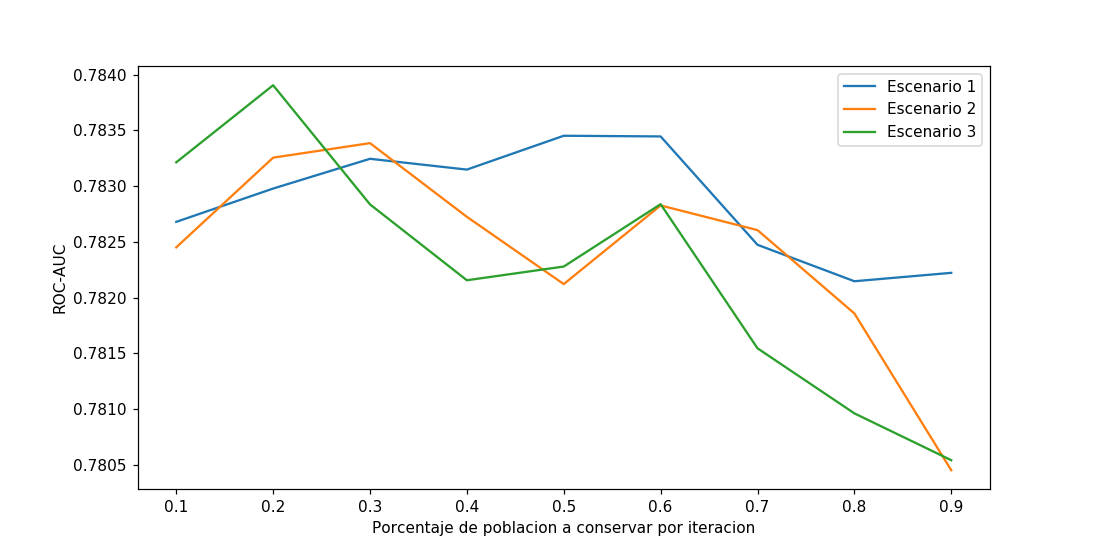

Text(0, 0.5, 'ROC-AUC')

In [7]:
plt.figure('Porcentaje de poblacion a conservar VS ROC-AUC (Validacion)', figsize=(10,5))
plt.plot(pob1['prob_seleccion'],pob1['best_Scores'], label = 'hola')
plt.plot(pob2['prob_seleccion'],pob2['best_Scores'])
plt.plot(pob3['prob_seleccion'],pob3['best_Scores'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Porcentaje de poblacion a conservar por iteracion')
plt.ylabel('ROC-AUC')

<IPython.core.display.Javascript object>


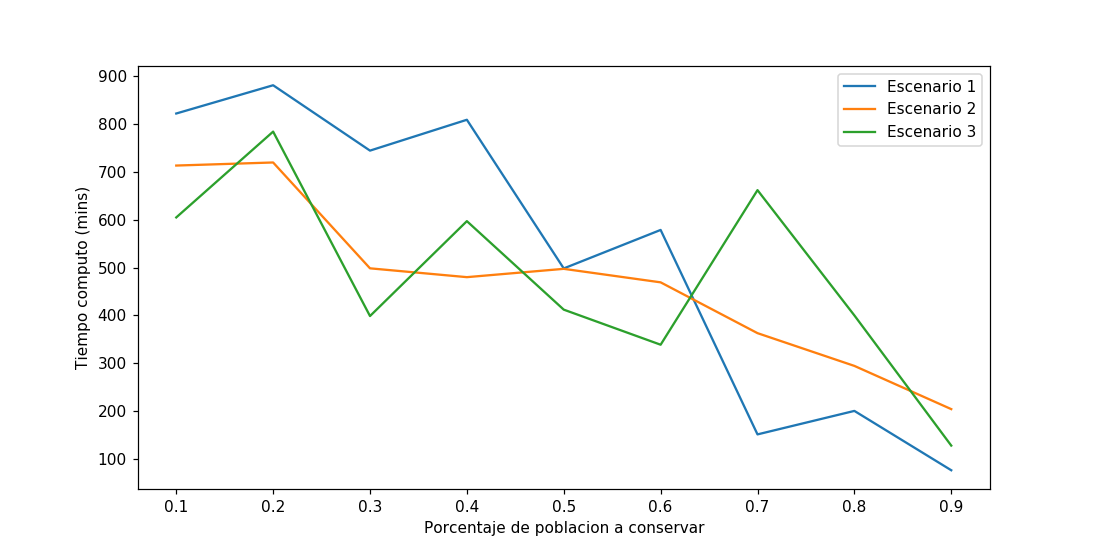

Text(0, 0.5, 'Tiempo computo (mins)')

In [9]:
plt.figure('Porcentaje de poblacion a conservar VS Tiempo Computo', figsize=(10,5))
plt.plot(pob1['prob_seleccion'],pob1['tiempo'], label = 'hola')
plt.plot(pob2['prob_seleccion'],pob2['tiempo'])
plt.plot(pob3['prob_seleccion'],pob3['tiempo'])
plt.legend(['Escenario 1','Escenario 2', 'Escenario 3'])
plt.xlabel('Porcentaje de poblacion a conservar')
plt.ylabel('Tiempo computo (mins)')

# Obtencion de desempeno de modelos

In [8]:
train = pd.read_csv("data/train_z.csv").drop(columns=["TW", "BARRIO"])
validation = pd.read_csv("data/validation_z.csv").drop(columns=["TW", "BARRIO"])
test = pd.read_csv("data/test_z.csv").drop(columns=["TW", "BARRIO"])

# Divide conjunto de datos en entrenamiento y en prueba
X_train = train.drop(columns="Accidente")
Y_train = train["Accidente"]

X_val = validation.drop(columns="Accidente")
Y_val = validation["Accidente"]

X_test = test.drop(columns="Accidente")
Y_test = test["Accidente"]

### Modelo seleccionado mirando probabilidad de mutacion

In [9]:
### probabilidad de mutacion 0.3 del escenario 1
with open('data/output/Escenario 1/mutacion/output_1_2_2020-08-30_17_26_18_probMutacion.json') as json_file:
    res1 = json.load(json_file)
    
print(f"Best fitness: {res1['best_score']}")
print(f"Tiempo de computo: {round(res1['execution_time_mins']/60,2)} mins")
print(f"Best solucion: {res1['best_mod']}")    

Best fitness: 0.785376326734016
Tiempo de computo: 773.03 mins
Best solucion: {'layer_sizes': [19, 114, 62], 'activation': 'tanh', 'alpha': 1.3422882364300124, 'learning_rate_init': 0.001, 'fitness': 0.785376326734016}


<IPython.core.display.Javascript object>


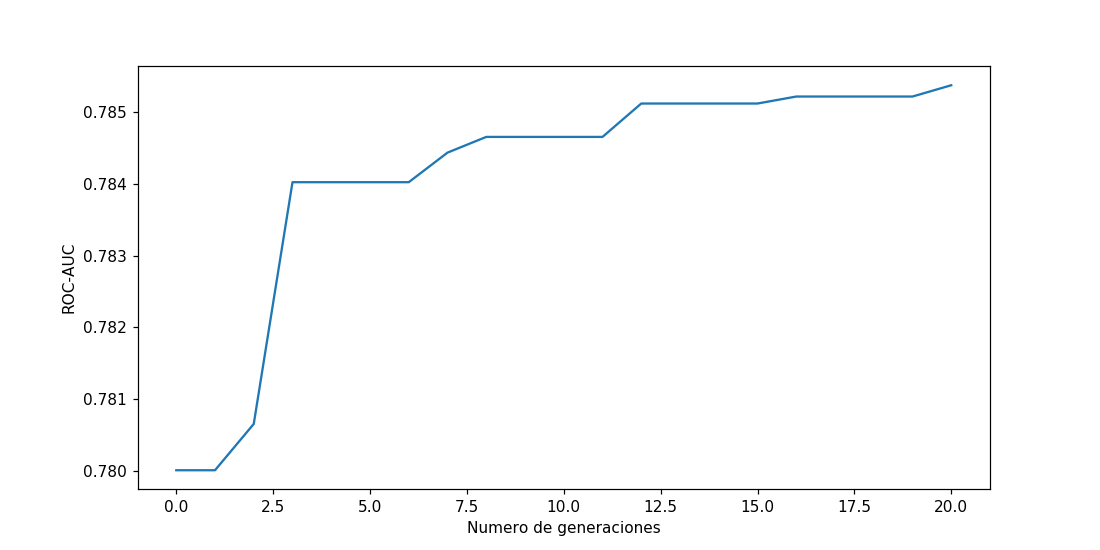

Text(0, 0.5, 'ROC-AUC')

In [10]:
### Evolucion del metodo vs numero de generaciones
plt.figure('Numero de generaciones VS ROC-AUC (validacion)', figsize=(10,5))
plt.plot(range(res1['num_generaciones']+1),res1['history'])
plt.xlabel('Numero de generaciones')
plt.ylabel('ROC-AUC')

In [11]:
### Evaluacion del modelo
best_mod1, score = funciones.entrenar_NN(X_train, Y_train, X_val, Y_val, 3, res1['best_mod'])

In [12]:
### Validation
preds1v = best_mod1.predict(X_val)
proba1v = best_mod1.predict_proba(X_val)[:, 1]

pr_auc1v = funciones.precision_recall_auc_score(Y_val, proba1v)
roc_auc1v = metrics.roc_auc_score(Y_val, proba1v)
precision1v = metrics.precision_score(Y_val, preds1v)
recall1v = metrics.recall_score(Y_val, preds1v)
fscore1v = metrics.f1_score(Y_val, preds1v)
print('VALIDACION')
print(f'PR-AUC:{pr_auc1v}')
print(f'ROC-AUC:{roc_auc1v}')
print(f'Precision-AUC:{precision1v}')
print(f'Recall-AUC:{recall1v}')
print(f'FScore-AUC:{fscore1v}')

print('**'*20)
### Test
preds1 = best_mod1.predict(X_test)
proba1 = best_mod1.predict_proba(X_test)[:, 1]

pr_auc1 = funciones.precision_recall_auc_score(Y_test, proba1)
roc_auc1 = metrics.roc_auc_score(Y_test, proba1)
precision1 = metrics.precision_score(Y_test, preds1)
recall1 = metrics.recall_score(Y_test, preds1)
fscore1 = metrics.f1_score(Y_test, preds1)
print('TEST')
print(f'PR-AUC:{pr_auc1}')
print(f'ROC-AUC:{roc_auc1}')
print(f'Precision-AUC:{precision1}')
print(f'Recall-AUC:{recall1}')
print(f'FScore-AUC:{fscore1}')

VALIDACION
PR-AUC:0.05988408332510696
ROC-AUC:0.785376326734016
Precision-AUC:0.06908881199538638
Recall-AUC:0.4315561959654179
FScore-AUC:0.11910916683237224
****************************************
TEST
PR-AUC:0.06271399930478255
ROC-AUC:0.7746229625858652
Precision-AUC:0.0710683710566436
Recall-AUC:0.3763975155279503
FScore-AUC:0.11956200059189108


### Modelo seleccionando mirando proporcion a conservar de la poblacion cada iteracion

In [13]:
### porcentaje a conservar de 0.2 del escenario 3
with open('data/output/Escenario 3/seleccion/output_3_1_2020-08-28_20_23_32_probSeleccion.json') as json_file:
    res2 = json.load(json_file)
    
print(f"Best fitness: {res2['best_score']}")
print(f"Tiempo de computo: {round(res2['execution_time_mins']/60,2)} mins")
print(f"Best solucion: {res2['best_mod']}")    

Best fitness: 0.7839055791657215
Tiempo de computo: 784.3 mins
Best solucion: {'layer_sizes': [108, 57, 118], 'activation': 'logistic', 'alpha': 0.19486547618408442, 'learning_rate_init': 0.022013225747051824, 'fitness': 0.7839055791657215}


<IPython.core.display.Javascript object>


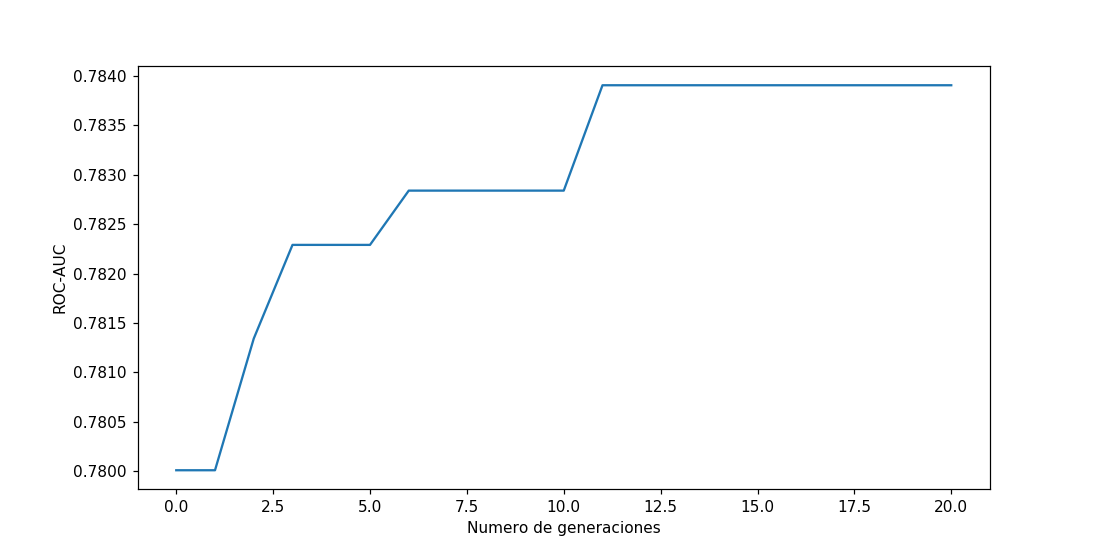

Text(0, 0.5, 'ROC-AUC')

In [14]:
### Evolucion del metodo vs porcentaje a conservar de poblacion
plt.figure('Porcentaje a conservar VS ROC-AUC (validacion)', figsize=(10,5))
plt.plot(range(res2['num_generaciones']+1),res2['history'])
plt.xlabel('Numero de generaciones')
plt.ylabel('ROC-AUC')

In [15]:
### Evaluacion del modelo
best_mod2, score = funciones.entrenar_NN(X_train, Y_train, X_val, Y_val, 3, res2['best_mod'])

In [16]:
### Validation
preds2v = best_mod2.predict(X_val)
proba2v = best_mod2.predict_proba(X_val)[:, 1]

pr_auc2v = funciones.precision_recall_auc_score(Y_val, proba2v)
roc_auc2v = metrics.roc_auc_score(Y_val, proba2v)
precision2v = metrics.precision_score(Y_val, preds2v)
recall2v = metrics.recall_score(Y_val, preds2v)
fscore2v = metrics.f1_score(Y_val, preds2v)
print('VALIDACION')
print(f'PR-AUC:{pr_auc2v}')
print(f'ROC-AUC:{roc_auc2v}')
print(f'Precision-AUC:{precision2v}')
print(f'Recall-AUC:{recall2v}')
print(f'FScore-AUC:{fscore2v}')

print('**'*20)
### Test
preds2 = best_mod2.predict(X_test)
proba2 = best_mod2.predict_proba(X_test)[:, 1]

pr_auc2 = funciones.precision_recall_auc_score(Y_test, proba2)
roc_auc2 = metrics.roc_auc_score(Y_test, proba2)
precision2 = metrics.precision_score(Y_test, preds2)
recall2 = metrics.recall_score(Y_test, preds2)
fscore2 = metrics.f1_score(Y_test, preds2)
print('TEST')
print(f'PR-AUC:{pr_auc2}')
print(f'ROC-AUC:{roc_auc2}')
print(f'Precision-AUC:{precision2}')
print(f'Recall-AUC:{recall2}')
print(f'FScore-AUC:{fscore2}')

VALIDACION
PR-AUC:0.06032885116094242
ROC-AUC:0.7839055791657215
Precision-AUC:0.06353310554991227
Recall-AUC:0.4956772334293948
FScore-AUC:0.11262994188425964
****************************************
TEST
PR-AUC:0.06337818403652062
ROC-AUC:0.7728243139357223
Precision-AUC:0.06547452733538232
Recall-AUC:0.4366459627329193
FScore-AUC:0.11387381550174132
